#Carico il Dataset e le librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot.head()
tabella_tot.columns


Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')

#Modelli - Comp1

In [2]:
tabella_tot=pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_1=tabella_tot

<ipython-input-3-1d9c395a1e87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


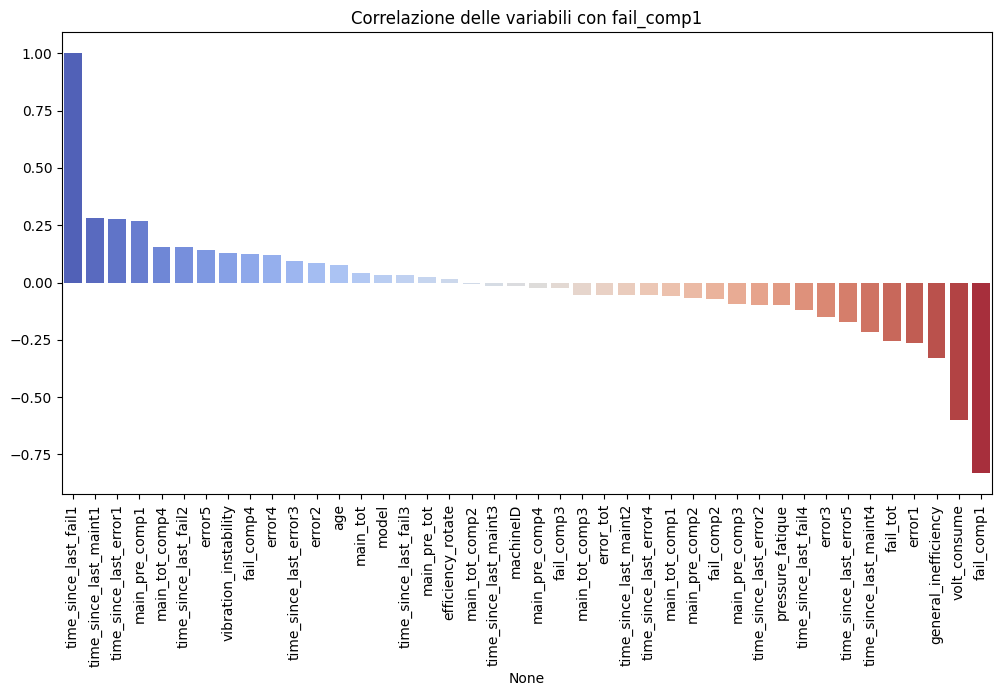

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [3]:
# Correlazione con la variabile target
target_corr = tabella_tot_1.corr()["time_since_last_fail1"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp1")
plt.show()
print(tabella_tot.columns)

In [4]:
tabella_tot_1 = tabella_tot_1[['efficiency_rotate', 'volt_consume','general_inefficiency',\
                               'pressure_fatique', 'vibration_instability','fail_comp1',\
                               'error1','fail_tot','age', 'model','main_pre_comp1',\
                               'main_pre_tot','time_since_last_fail1']].copy()
tabella_tot_1["fail1_inefficiency"] = tabella_tot_1["fail_comp1"]/tabella_tot_1["general_inefficiency"]
tabella_tot_1["volt_inefficiency"] = tabella_tot_1["volt_consume"]/tabella_tot_1["general_inefficiency"]
tabella_tot_1["error1_fail1"] = tabella_tot_1["error1"]/tabella_tot_1["fail_comp1"]
tabella_tot_1["main_pre_fail"] = tabella_tot_1["main_pre_comp1"]/tabella_tot_1["fail_comp1"] + 0.000001
tabella_tot_1["error1_fail1"] = tabella_tot_1["error1"]/tabella_tot_1["fail_comp1"]
tabella_tot_1["high_vibration"] = (tabella_tot_1["vibration_instability"] > tabella_tot_1["vibration_instability"].median()).astype(int)
tabella_tot_1["volt_time_fail1"] = tabella_tot_1["volt_consume"]*tabella_tot_1["fail_comp1"]
tabella_tot_1["inefficency_time_fail1"] = tabella_tot_1["general_inefficiency"]*tabella_tot_1["fail_comp1"]
tabella_tot_1["fail_tot_per_inefficiency"] = tabella_tot_1["fail_tot"] / (tabella_tot_1["general_inefficiency"] + 1)
tabella_tot_1["fail_tot_per_volt"] = tabella_tot_1["fail_tot"] / (tabella_tot_1["volt_consume"] + 1)
tabella_tot_1["error1_x_main_pre_comp1"] = tabella_tot_1["error1"] * tabella_tot_1["main_pre_comp1"]
tabella_tot_1["volt_x_inefficiency"] = tabella_tot_1["volt_consume"] * tabella_tot_1["general_inefficiency"]

# Trasformazioni logaritmiche (evitando log(0) con log1p)
tabella_tot_1["log_fail_tot"] = np.log1p(tabella_tot_1["fail_tot"])
tabella_tot_1["log_inefficiency"] = np.log1p(tabella_tot_1["general_inefficiency"])
tabella_tot_1["model_x_fail_tot"] = tabella_tot_1["model"] * tabella_tot_1["fail_tot"]
tabella_tot_1["model_x_volt"] = tabella_tot_1["model"] * tabella_tot_1["volt_consume"]
tabella_tot_1["model_x_age"] = tabella_tot_1["model"] * tabella_tot_1["age"]
tabella_tot_1.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_1.fillna(0, inplace=True)

In [5]:
print(tabella_tot_1.head())
X = tabella_tot_1.drop('time_since_last_fail1',axis='columns')
y = tabella_tot_1['time_since_last_fail1']

   efficiency_rotate  volt_consume  general_inefficiency  pressure_fatique  \
0           0.642191      0.669609              0.602641          0.541367   
1           0.642267      0.669322              0.601702          0.540677   
2           0.642546      0.668925              0.602060          0.541285   
3           0.641785      0.668927              0.601642          0.540838   
4           0.642943      0.670435              0.603195          0.543507   

   vibration_instability  fail_comp1  error1  fail_tot  age  model  ...  \
0               0.528529           1      11         7   18      3  ...   
1               0.524821           1       5         4    7      4  ...   
2               0.527084           1      11         5    8      3  ...   
3               0.525343           2      10         6    7      3  ...   
4               0.524343           4      14         7    2      3  ...   

   inefficency_time_fail1  fail_tot_per_inefficiency  fail_tot_per_volt  \
0    

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Migliori parametri trovati: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

*** Random Forest Ottimizzato ***
MAE  = 37.4555
MAPE = 18.7246%
MSE  = 52311.42
R²   = 0.7211


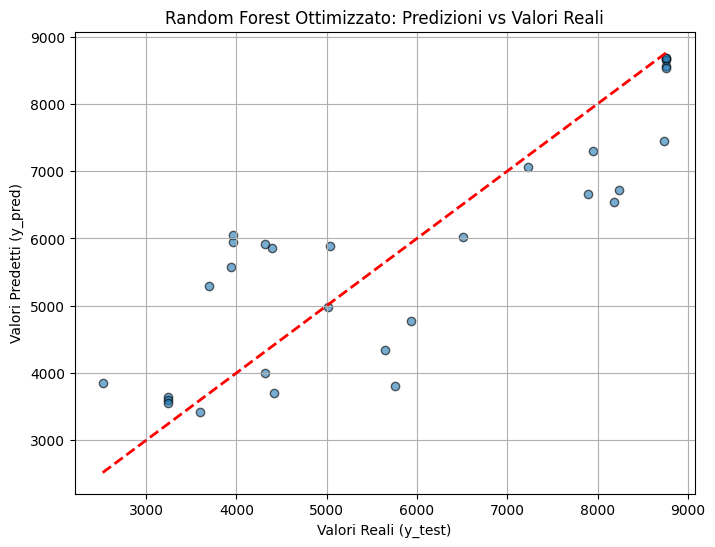

In [7]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione della funzione di valutazione
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modello"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred) / 24
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) / 24
    r2 = r2_score(y_test, y_pred)

    print(f"\n*** {model_name} ***")
    print(f"MAE  = {mae:.4f}")
    print(f"MAPE = {mape:.4%}")
    print(f"MSE  = {mse:.2f}")
    print(f"R²   = {r2:.4f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
    plt.xlabel("Valori Reali (y_test)")
    plt.ylabel("Valori Predetti (y_pred)")
    plt.title(f"{model_name}: Predizioni vs Valori Reali")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)
    plt.grid(True)
    plt.show()

# Definiamo la griglia di iperparametri
param_grid = {
    'n_estimators': [200, 400, 600, 800],  # Numero di alberi nella foresta
    'max_depth': [10, 20, 30],             # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10],       # Minimo numero di campioni per split
    'min_samples_leaf': [1, 2, 4],         # Minimo numero di campioni nelle foglie
}

# Inizializziamo il modello
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Creiamo il GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',       # Ottimizziamo per il valore R²
    cv=5,               # 5-fold Cross Validation
    verbose=2,
    n_jobs=-1
)

# Addestriamo la GridSearch
grid_search.fit(X_train, y_train)

# Stampiamo i migliori parametri trovati
print(f"\nMigliori parametri trovati: {grid_search.best_params_}")

# Valutiamo il miglior modello trovato
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_train, y_train, X_test, y_test, "Random Forest Ottimizzato")




Migliori parametri trovati: (100, 0.1, 3, 0.9, 1.0)

*** XGBoost Ottimizzato ***
MAE  = 31.6781
MAPE = 15.8216%
MSE  = 38600.37
R²   = 0.7942


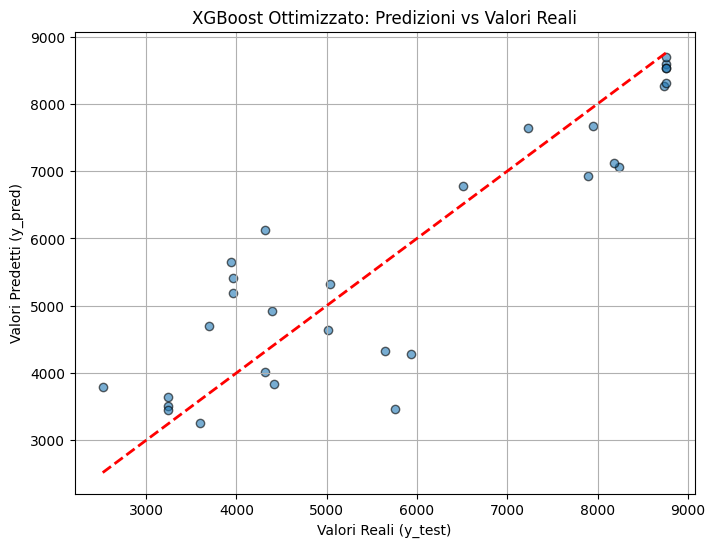

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from itertools import product

# Funzione per valutare il modello
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modello"):
    """ Addestra il modello e stampa le metriche di valutazione. """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred) / 24
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) / 24
    r2 = r2_score(y_test, y_pred)

    print(f"\n*** {model_name} ***")
    print(f"MAE  = {mae:.4f}")
    print(f"MAPE = {mape:.4%}")
    print(f"MSE  = {mse:.2f}")
    print(f"R²   = {r2:.4f}")

    # Grafico Predizioni vs Valori Reali
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
    plt.xlabel("Valori Reali (y_test)")
    plt.ylabel("Valori Predetti (y_pred)")
    plt.title(f"{model_name}: Predizioni vs Valori Reali")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)
    plt.grid(True)
    plt.show()

# Definizione del parametro grid manuale
param_grid = {
    'n_estimators': [100, 300, 500],        # Numero di alberi
    'learning_rate': [0.01, 0.05, 0.1],     # Tasso di apprendimento
    'max_depth': [3, 6, 10],                # Profondità degli alberi
    'subsample': [0.7, 0.9, 1.0],           # Campionamento dei dati
    'colsample_bytree': [0.7, 0.9, 1.0]     # Percentuale di feature usate per albero
}

# Creiamo tutte le combinazioni di parametri
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['learning_rate'],
    param_grid['max_depth'],
    param_grid['subsample'],
    param_grid['colsample_bytree']
))

# Variabili per tracciare il miglior modello
best_model = None
best_score = float('-inf')
best_params = None

# Loop su tutte le combinazioni
for params in param_combinations:
    n_estimators, learning_rate, max_depth, subsample, colsample_bytree = params

    # Inizializza il modello con i parametri attuali
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    # Addestramento e valutazione
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Salviamo il miglior modello
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_params = params

# Stampiamo i migliori parametri trovati
print(f"\nMigliori parametri trovati: {best_params}")

# Valutiamo il miglior modello
evaluate_model(best_model, X_train, y_train, X_test, y_test, "XGBoost Ottimizzato")


*** Linear Regression ***
MAE = 47.45875125461154
MAPE = 0.23235832864322065
MSE = 71938.19575341915
R2 = 0.6164197289689876


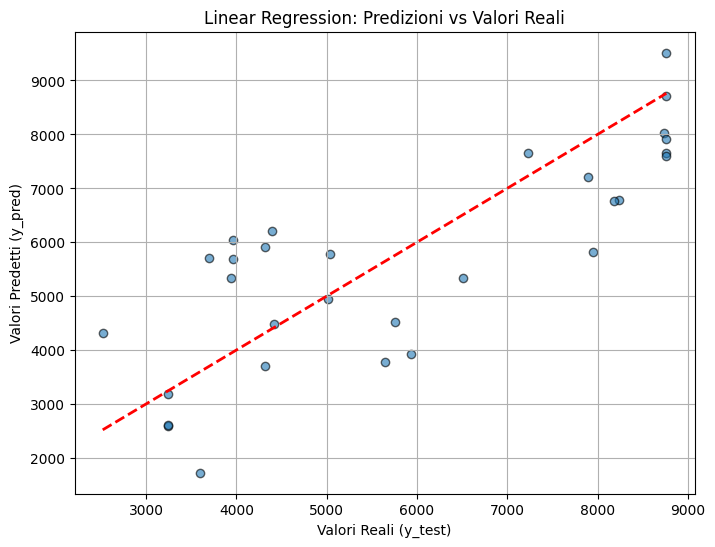

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
print("*** Linear Regression ***")

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred)/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred)/24))
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 2
MAE: 68.6465
MAPE: 29.3385%
MSE: 171594.8010
R2: 0.0850


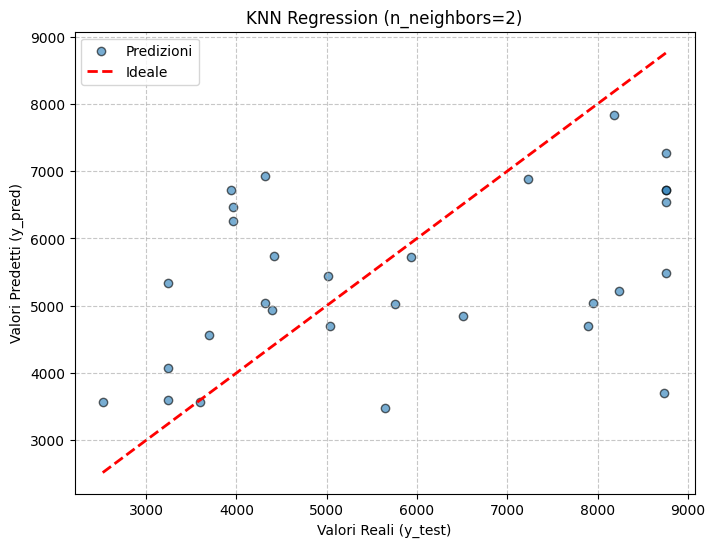

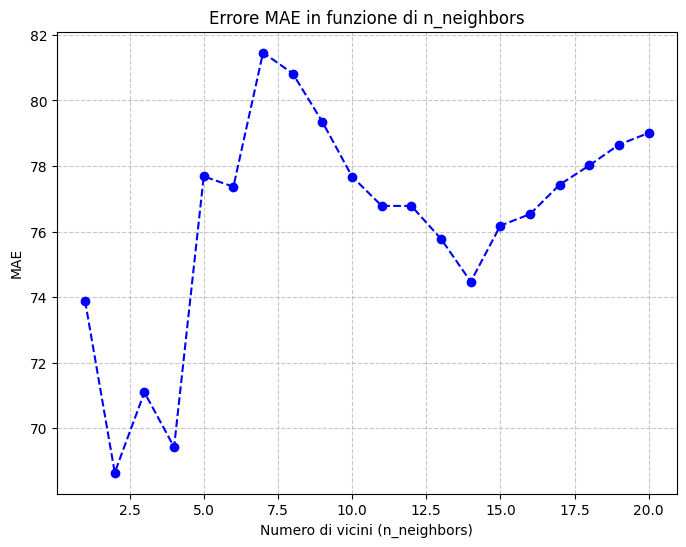

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = (mean_squared_error(y_test, y_pred))/24
r2 = r2_score(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Modelli - Comp2

In [11]:
tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_2 = tabella_tot
tabella_tot_2.head()

,machineID,error1,error2,error3,error4,error5,error_tot,fail_comp1,fail_comp2,fail_comp3,...,time_since_last_error1,time_since_last_error2,time_since_last_error3,time_since_last_error4,time_since_last_error5,efficiency_rotate,volt_consume,general_inefficiency,pressure_fatique,vibration_instability
0,1,11,6,9,5,4,35,1,2,0,...,2173,3161,2529,5399,3959,0.642191,0.669609,0.602641,0.541367,0.528529
1,2,5,10,5,5,3,28,1,3,0,...,3620,2290,4934,3883,3590,0.642267,0.669322,0.601702,0.540677,0.524821
2,3,11,10,8,8,2,39,1,4,0,...,3408,2169,2444,2511,6548,0.642546,0.668925,0.602060,0.541285,0.527084
3,4,10,11,8,2,0,31,2,4,0,...,3471,1920,2519,4979,8761,0.641785,0.668927,0.601642,0.540838,0.525343
4,5,14,8,7,6,3,38,4,3,0,...,1257,2221,2595,3146,3675,0.642943,0.670435,0.603195,0.543507,0.524343


<ipython-input-12-5163cfeeaec6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


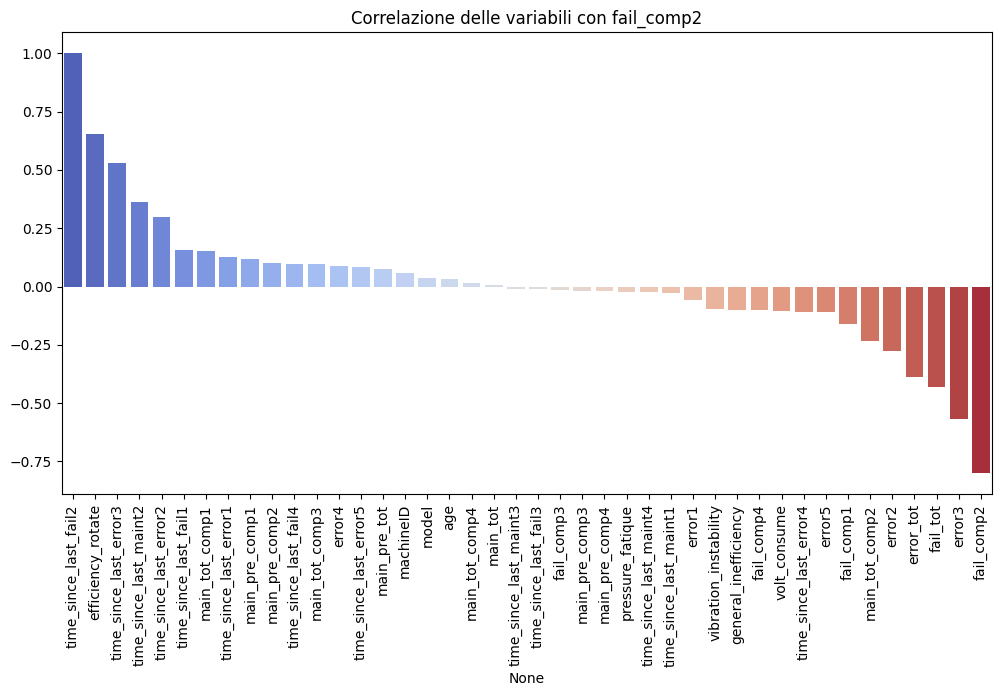

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [12]:
# Correlazione con la variabile target
target_corr = tabella_tot_2.corr()["time_since_last_fail2"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp2")
plt.show()
print(tabella_tot.columns)

In [ ]:
tabella_tot_2 = tabella_tot_2[['volt_consume','efficiency_rotate',\
                               'pressure_fatique', 'vibration_instability','fail_comp2',\
                               'error3','fail_tot','age', 'model','main_pre_comp2',\
                               'main_pre_tot','time_since_last_fail2','error_tot']]
tabella_tot_2["fail2_efficiency"] = tabella_tot_2["fail_comp2"]/tabella_tot_2["efficiency_rotate"]
tabella_tot_2["volt_efficiency"] = tabella_tot_2["volt_consume"]/tabella_tot_2["efficiency_rotate"]
tabella_tot_2["error3_fail2"] = tabella_tot_2["error3"]/tabella_tot_2["fail_comp2"]
tabella_tot_2["main_pre_fai2"] = tabella_tot_2["main_pre_comp2"]/tabella_tot_2["fail_comp2"] + 0.000001
tabella_tot_2["error3_fail2"] = tabella_tot_2["error3"]/tabella_tot_2["fail_comp2"]
tabella_tot_2["high_vibration"] = (tabella_tot_2["vibration_instability"] > tabella_tot_2["vibration_instability"].median()).astype(int)
tabella_tot_2["volt_time_fail2"] = tabella_tot_2["volt_consume"]*tabella_tot_2["fail_comp2"]
tabella_tot_2["efficency_time_fail1"] = tabella_tot_2["efficiency_rotate"]*tabella_tot_2["fail_comp2"]
tabella_tot_2["fail_tot_per_inefficiency"] = tabella_tot_2["fail_tot"] / (tabella_tot_2["efficiency_rotate"] + 1)
tabella_tot_2["fail_tot_per_volt"] = tabella_tot_2["fail_tot"] / (tabella_tot_2["volt_consume"] + 1)
tabella_tot_2["error3_x_main_pre_comp2"] = tabella_tot_2["error3"] * tabella_tot_2["main_pre_comp2"]
tabella_tot_2["volt_x_efficiency"] = tabella_tot_2["volt_consume"] * tabella_tot_2["efficiency_rotate"]

# Trasformazioni logaritmiche (evitando log(0) con log1p)
tabella_tot_2["log_fail_tot"] = np.log1p(tabella_tot_2["fail_tot"])
tabella_tot_2["log_efficiency"] = np.log1p(tabella_tot_2["efficiency_rotate"])
tabella_tot_2["model_x_fail_tot"] = tabella_tot_2["model"] * tabella_tot_2["fail_tot"]
tabella_tot_2["model_x_volt"] = tabella_tot_2["model"] * tabella_tot_2["volt_consume"]
tabella_tot_2["model_x_age"] = tabella_tot_2["model"] * tabella_tot_2["age"]
tabella_tot_2.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_2.fillna(0, inplace=True)

In [14]:
X = tabella_tot_2.drop('time_since_last_fail2',axis='columns')
y = tabella_tot_2['time_since_last_fail2']
print(tabella_tot_2.head())

   volt_consume  efficiency_rotate  pressure_fatique  vibration_instability  \
0      0.669609           0.642191          0.541367               0.528529   
1      0.669322           0.642267          0.540677               0.524821   
2      0.668925           0.642546          0.541285               0.527084   
3      0.668927           0.641785          0.540838               0.525343   
4      0.670435           0.642943          0.543507               0.524343   

   fail_comp2  error3  fail_tot  age  model  main_pre_comp2  ...  \
0           2       9         7   18      3               6  ...   
1           3       5         4    7      4               5  ...   
2           4       8         5    8      3               7  ...   
3           4       8         6    7      3               2  ...   
4           3       7         7    2      3               7  ...   

   efficency_time_fail1  fail_tot_per_inefficiency  fail_tot_per_volt  \
0              1.284383                   4

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Migliori parametri trovati: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

*** Random Forest Ottimizzato ***
MAE  = 39.0126
MAPE = 23.0998%
MSE  = 51366.54
R²   = 0.6509


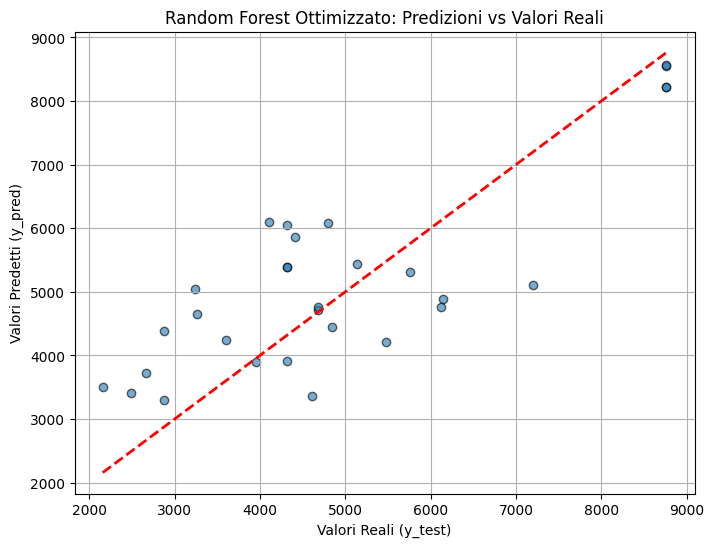

In [16]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione della funzione di valutazione
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modello"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred) / 24
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) / 24
    r2 = r2_score(y_test, y_pred)

    print(f"\n*** {model_name} ***")
    print(f"MAE  = {mae:.4f}")
    print(f"MAPE = {mape:.4%}")
    print(f"MSE  = {mse:.2f}")
    print(f"R²   = {r2:.4f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
    plt.xlabel("Valori Reali (y_test)")
    plt.ylabel("Valori Predetti (y_pred)")
    plt.title(f"{model_name}: Predizioni vs Valori Reali")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)
    plt.grid(True)
    plt.show()

# Definiamo la griglia di iperparametri
param_grid = {
    'n_estimators': [200, 400, 600, 800],  # Numero di alberi nella foresta
    'max_depth': [10, 20, 30],             # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10],       # Minimo numero di campioni per split
    'min_samples_leaf': [1, 2, 4],         # Minimo numero di campioni nelle foglie
}

# Inizializziamo il modello
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Creiamo il GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',       # Ottimizziamo per il valore R²
    cv=5,               # 5-fold Cross Validation
    verbose=2,
    n_jobs=-1
)

# Addestriamo la GridSearch
grid_search.fit(X_train, y_train)

# Stampiamo i migliori parametri trovati
print(f"\nMigliori parametri trovati: {grid_search.best_params_}")

# Valutiamo il miglior modello trovato
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_train, y_train, X_test, y_test, "Random Forest Ottimizzato")



Migliori parametri trovati: (100, 0.1, 6, 1.0, 0.7)

*** XGBoost Ottimizzato ***
MAE  = 37.1873
MAPE = 21.9763%
MSE  = 46022.11
R²   = 0.6872


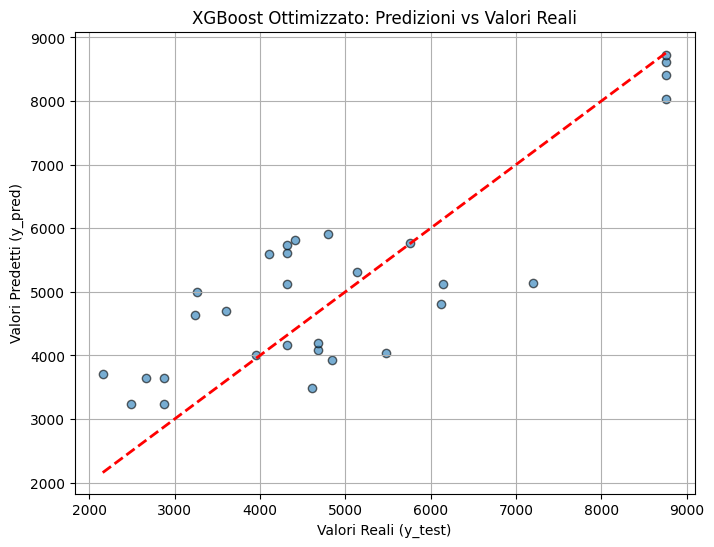

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from itertools import product

# Funzione per valutare il modello
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modello"):
    """ Addestra il modello e stampa le metriche di valutazione. """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred) / 24
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) / 24
    r2 = r2_score(y_test, y_pred)

    print(f"\n*** {model_name} ***")
    print(f"MAE  = {mae:.4f}")
    print(f"MAPE = {mape:.4%}")
    print(f"MSE  = {mse:.2f}")
    print(f"R²   = {r2:.4f}")

    # Grafico Predizioni vs Valori Reali
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
    plt.xlabel("Valori Reali (y_test)")
    plt.ylabel("Valori Predetti (y_pred)")
    plt.title(f"{model_name}: Predizioni vs Valori Reali")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)
    plt.grid(True)
    plt.show()

# Definizione del parametro grid manuale
param_grid = {
    'n_estimators': [100, 300, 500],        # Numero di alberi
    'learning_rate': [0.01, 0.05, 0.1],     # Tasso di apprendimento
    'max_depth': [3, 6, 10],                # Profondità degli alberi
    'subsample': [0.7, 0.9, 1.0],           # Campionamento dei dati
    'colsample_bytree': [0.7, 0.9, 1.0]     # Percentuale di feature usate per albero
}

# Creiamo tutte le combinazioni di parametri
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['learning_rate'],
    param_grid['max_depth'],
    param_grid['subsample'],
    param_grid['colsample_bytree']
))

# Variabili per tracciare il miglior modello
best_model = None
best_score = float('-inf')
best_params = None

# Loop su tutte le combinazioni
for params in param_combinations:
    n_estimators, learning_rate, max_depth, subsample, colsample_bytree = params

    # Inizializza il modello con i parametri attuali
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    # Addestramento e valutazione
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Salviamo il miglior modello
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_params = params

# Stampiamo i migliori parametri trovati
print(f"\nMigliori parametri trovati: {best_params}")

# Valutiamo il miglior modello
evaluate_model(best_model, X_train, y_train, X_test, y_test, "XGBoost Ottimizzato")



*** Linear Regression ***
MAE = 43.8520814259847
MAPE = 0.21826726833027324
MSE = 86223.15305812347
R2 = 0.41404090565742513


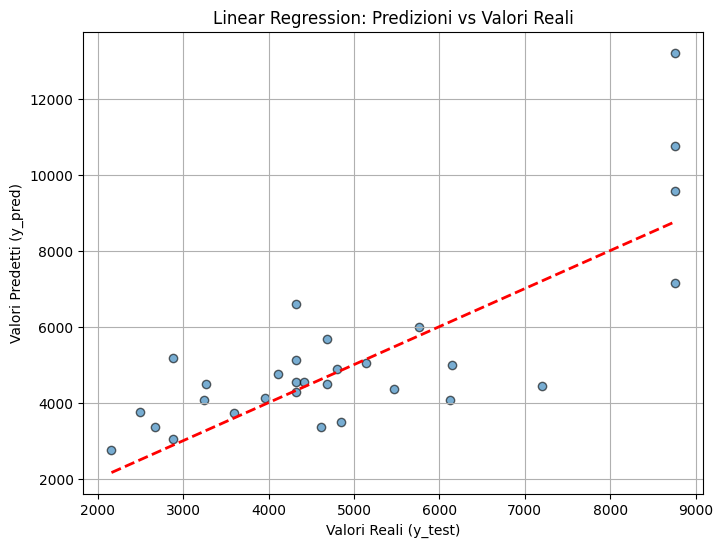

In [18]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")


clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 2
MAE: 52.9410
MAPE: 27.9017%
MSE: 133500.0753
R2: 0.0928


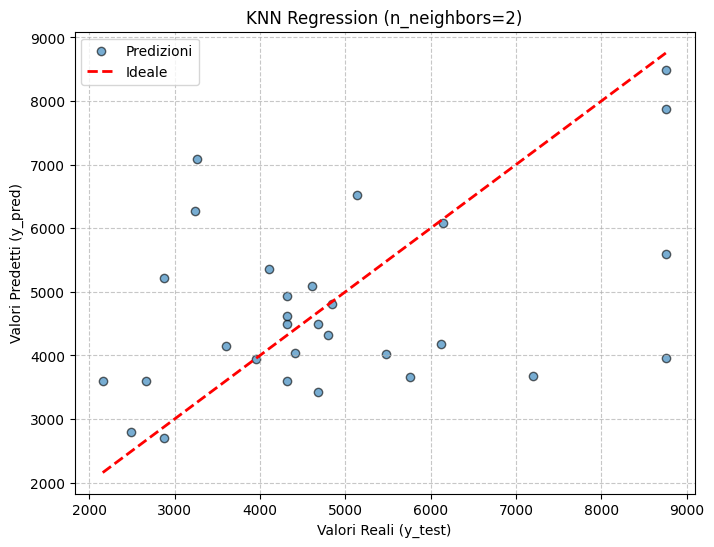

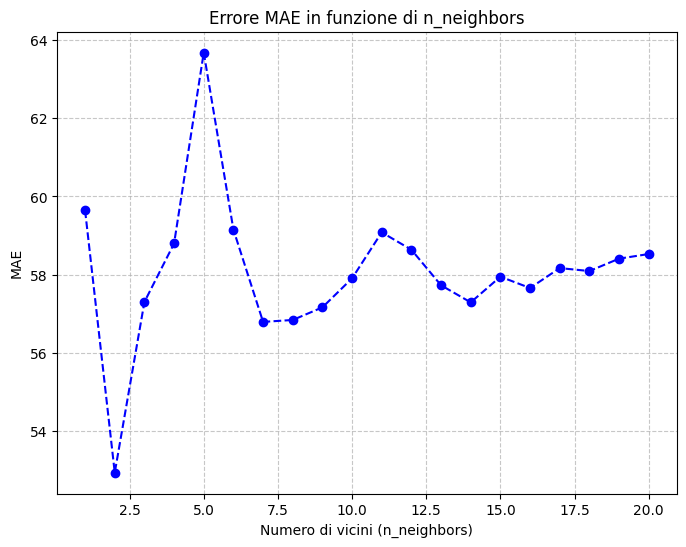

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = (mean_squared_error(y_test, y_pred)) /24
r2 = r2_score(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Modelli - Comp3

In [20]:
tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_3 = tabella_tot

<ipython-input-21-d0d86c0419bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


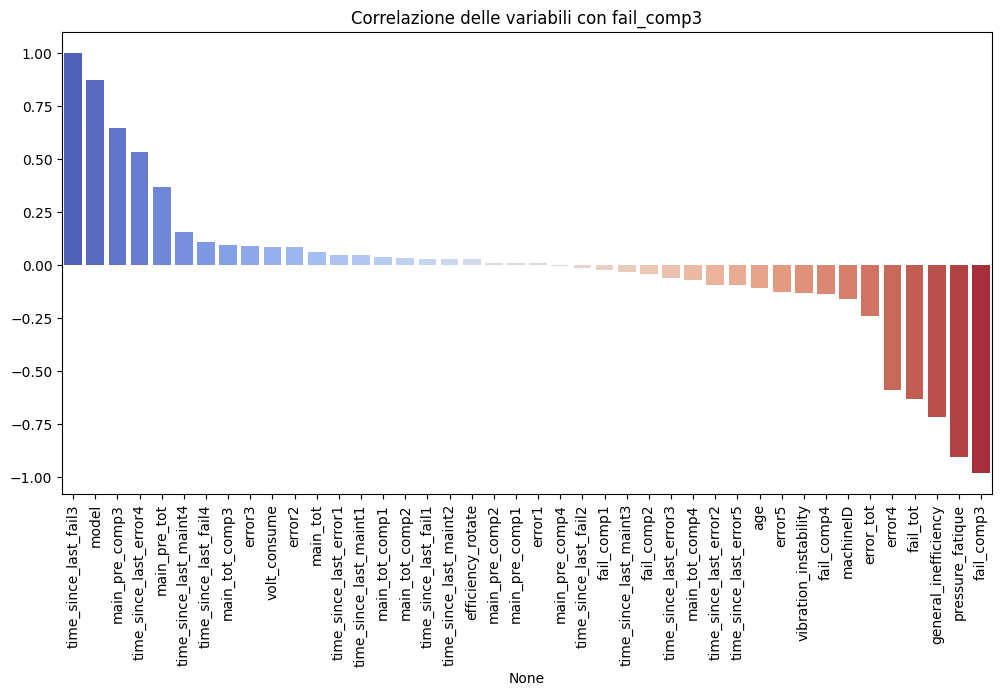

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [21]:
# Correlazione con la variabile target
target_corr = tabella_tot_3.corr()["time_since_last_fail3"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp3")
plt.show()
print(tabella_tot.columns)

In [ ]:
tabella_tot_3 = tabella_tot_3[['volt_consume','general_inefficiency',\
                               'pressure_fatique', 'vibration_instability','efficiency_rotate','fail_comp3',\
                               'error4','fail_tot','age', 'model','main_pre_comp3',\
                               'main_pre_tot','time_since_last_fail3','error_tot']]
tabella_tot_3["fail2_efficiency"] = tabella_tot_3["fail_comp3"]/tabella_tot_3["pressure_fatique"]
tabella_tot_3["volt_efficiency"] = tabella_tot_3["volt_consume"]/tabella_tot_3["pressure_fatique"]
tabella_tot_3["error3_fail2"] = tabella_tot_3["error4"]/tabella_tot_3["fail_comp3"]
tabella_tot_3["main_pre_fai2"] = tabella_tot_3["main_pre_comp3"]/tabella_tot_3["fail_comp3"] + 0.000001
tabella_tot_3["error3_fail2"] = tabella_tot_3["error4"]/tabella_tot_3["fail_comp3"]
tabella_tot_3["high_vibration"] = (tabella_tot_3["general_inefficiency"] > tabella_tot_3["general_inefficiency"].median()).astype(int)
tabella_tot_3["volt_time_fail2"] = tabella_tot_3["volt_consume"]*tabella_tot_3["fail_comp3"]
tabella_tot_3["efficency_time_fail1"] = tabella_tot_3["pressure_fatique"]*tabella_tot_3["fail_comp3"]
tabella_tot_3["fail_tot_per_inefficiency"] = tabella_tot_3["fail_tot"] / (tabella_tot_3["pressure_fatique"] + 1)
tabella_tot_3["fail_tot_per_volt"] = tabella_tot_3["fail_tot"] / (tabella_tot_3["volt_consume"] + 1)
tabella_tot_3["error3_x_main_pre_comp2"] = tabella_tot_3["error4"] * tabella_tot_3["main_pre_comp3"]
tabella_tot_3["volt_x_efficiency"] = tabella_tot_3["volt_consume"] * tabella_tot_3["pressure_fatique"]

# Trasformazioni logaritmiche (evitando log(0) con log1p)
tabella_tot_3["log_fail_tot"] = np.log1p(tabella_tot_3["fail_tot"])
tabella_tot_3["log_efficiency"] = np.log1p(tabella_tot_3["pressure_fatique"])
tabella_tot_3["model_x_fail_tot"] = tabella_tot_3["model"] * tabella_tot_3["fail_tot"]
tabella_tot_3["model_x_volt"] = tabella_tot_3["model"] * tabella_tot_3["volt_consume"]
tabella_tot_3["model_x_age"] = tabella_tot_3["model"] * tabella_tot_3["age"]
tabella_tot_3.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_3.fillna(0, inplace=True)

In [23]:
print(tabella_tot_3.head())
X = tabella_tot_3.drop('time_since_last_fail3',axis='columns')
y = tabella_tot_3['time_since_last_fail3']

   volt_consume  general_inefficiency  pressure_fatique  \
0      0.669609              0.602641          0.541367   
1      0.669322              0.601702          0.540677   
2      0.668925              0.602060          0.541285   
3      0.668927              0.601642          0.540838   
4      0.670435              0.603195          0.543507   

   vibration_instability  efficiency_rotate  fail_comp3  error4  fail_tot  \
0               0.528529           0.642191           0       5         7   
1               0.524821           0.642267           0       5         4   
2               0.527084           0.642546           0       8         5   
3               0.525343           0.641785           0       2         6   
4               0.524343           0.642943           0       6         7   

   age  model  ...  efficency_time_fail1  fail_tot_per_inefficiency  \
0   18      3  ...                   0.0                   4.541423   
1    7      4  ...                   0.0

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Migliori parametri trovati: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 600}

*** Random Forest Ottimizzato ***
MAE  = 8.2793
MAPE = 4.2228%
MSE  = 9363.91
R²   = 0.9577


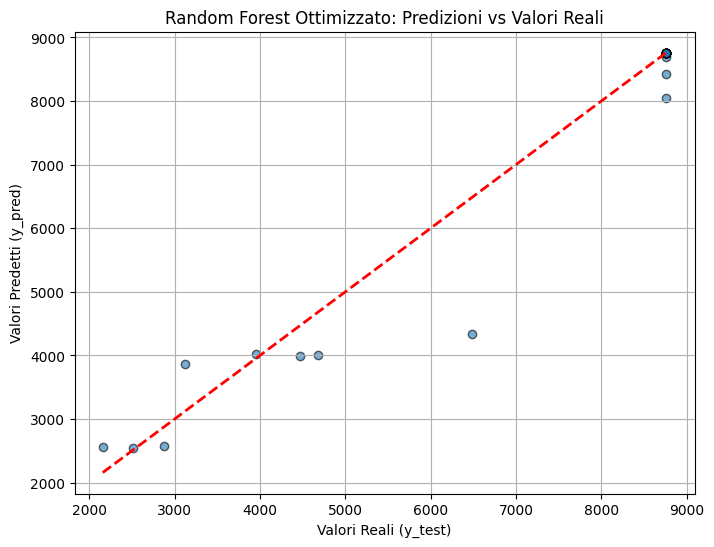

In [25]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione della funzione di valutazione
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modello"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred) / 24
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) / 24
    r2 = r2_score(y_test, y_pred)

    print(f"\n*** {model_name} ***")
    print(f"MAE  = {mae:.4f}")
    print(f"MAPE = {mape:.4%}")
    print(f"MSE  = {mse:.2f}")
    print(f"R²   = {r2:.4f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
    plt.xlabel("Valori Reali (y_test)")
    plt.ylabel("Valori Predetti (y_pred)")
    plt.title(f"{model_name}: Predizioni vs Valori Reali")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)
    plt.grid(True)
    plt.show()

# Definiamo la griglia di iperparametri
param_grid = {
    'n_estimators': [200, 400, 600, 800],  # Numero di alberi nella foresta
    'max_depth': [10, 20, 30],             # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10],       # Minimo numero di campioni per split
    'min_samples_leaf': [1, 2, 4],         # Minimo numero di campioni nelle foglie
}

# Inizializziamo il modello
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Creiamo il GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',       # Ottimizziamo per il valore R²
    cv=5,               # 5-fold Cross Validation
    verbose=2,
    n_jobs=-1
)

# Addestriamo la GridSearch
grid_search.fit(X_train, y_train)

# Stampiamo i migliori parametri trovati
print(f"\nMigliori parametri trovati: {grid_search.best_params_}")

# Valutiamo il miglior modello trovato
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_train, y_train, X_test, y_test, "Random Forest Ottimizzato")



Migliori parametri trovati: (500, 0.01, 3, 1.0, 0.7)

*** XGBoost Ottimizzato ***
MAE  = 7.0689
MAPE = 4.1915%
MSE  = 5336.31
R²   = 0.9759


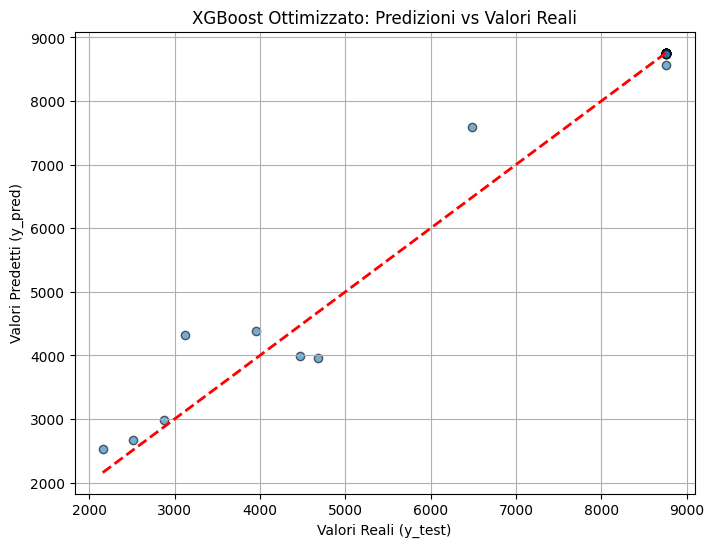

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from itertools import product

# Funzione per valutare il modello
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modello"):
    """ Addestra il modello e stampa le metriche di valutazione. """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred) / 24
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) / 24
    r2 = r2_score(y_test, y_pred)

    print(f"\n*** {model_name} ***")
    print(f"MAE  = {mae:.4f}")
    print(f"MAPE = {mape:.4%}")
    print(f"MSE  = {mse:.2f}")
    print(f"R²   = {r2:.4f}")

    # Grafico Predizioni vs Valori Reali
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
    plt.xlabel("Valori Reali (y_test)")
    plt.ylabel("Valori Predetti (y_pred)")
    plt.title(f"{model_name}: Predizioni vs Valori Reali")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)
    plt.grid(True)
    plt.show()

# Definizione del parametro grid manuale
param_grid = {
    'n_estimators': [100, 300, 500],        # Numero di alberi
    'learning_rate': [0.01, 0.05, 0.1],     # Tasso di apprendimento
    'max_depth': [3, 6, 10],                # Profondità degli alberi
    'subsample': [0.7, 0.9, 1.0],           # Campionamento dei dati
    'colsample_bytree': [0.7, 0.9, 1.0]     # Percentuale di feature usate per albero
}

# Creiamo tutte le combinazioni di parametri
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['learning_rate'],
    param_grid['max_depth'],
    param_grid['subsample'],
    param_grid['colsample_bytree']
))

# Variabili per tracciare il miglior modello
best_model = None
best_score = float('-inf')
best_params = None

# Loop su tutte le combinazioni
for params in param_combinations:
    n_estimators, learning_rate, max_depth, subsample, colsample_bytree = params

    # Inizializza il modello con i parametri attuali
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    # Addestramento e valutazione
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Salviamo il miglior modello
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_params = params

# Stampiamo i migliori parametri trovati
print(f"\nMigliori parametri trovati: {best_params}")

# Valutiamo il miglior modello
evaluate_model(best_model, X_train, y_train, X_test, y_test, "XGBoost Ottimizzato")



*** Linear Regression ***
MAE = 21.25045954320166
MAPE = 0.09292401626318421
MSE = 19316.621479686917
R2 = 0.912790990797418


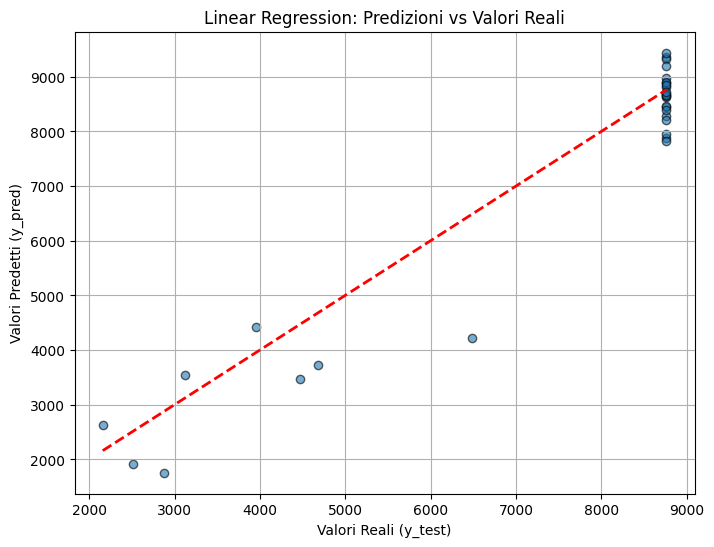

In [27]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 1
MAE: 31.5083
MAPE: 16.6481%
MSE: 118379.8167
R2: 0.4655


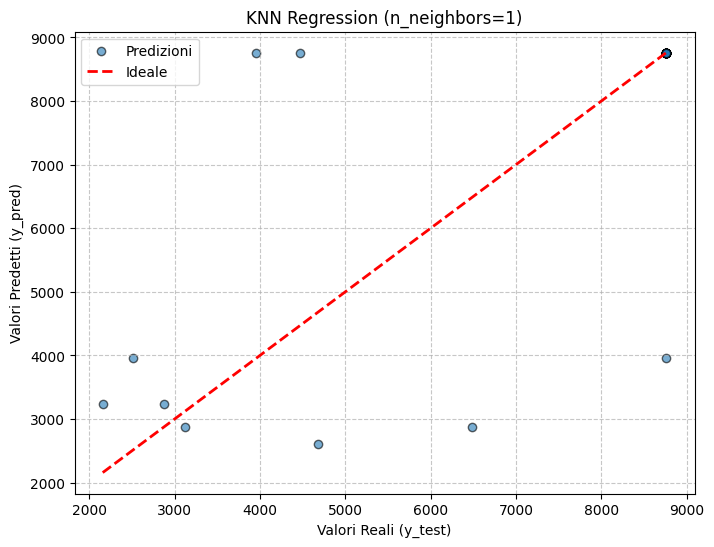

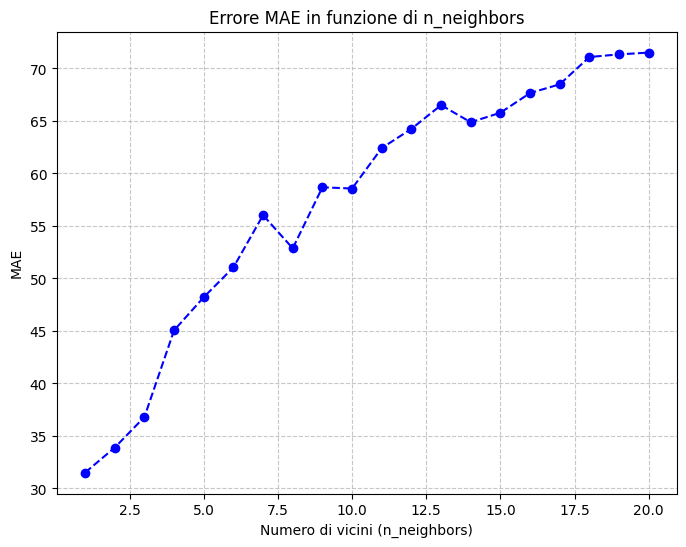

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = (mean_squared_error(y_test, y_pred)) /24
r2 = r2_score(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Modelli - Comp4

In [29]:
tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_4 = tabella_tot

<ipython-input-30-5440874adc27>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


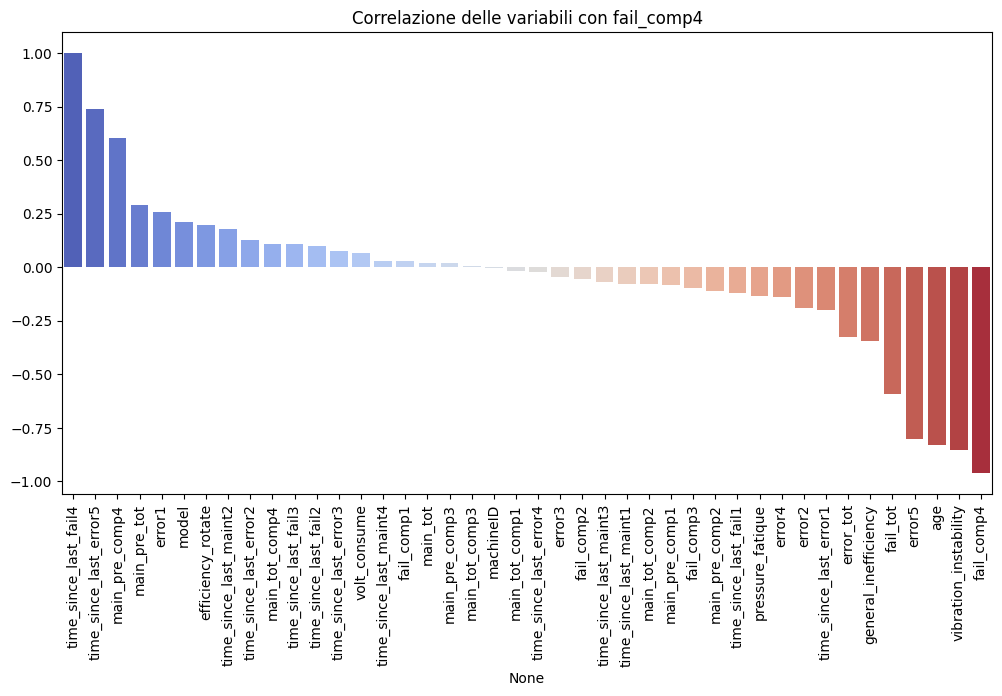

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [30]:
# Correlazione con la variabile target
target_corr = tabella_tot_4.corr()["time_since_last_fail4"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp4")
plt.show()
print(tabella_tot_4.columns)

In [ ]:
tabella_tot_4 = tabella_tot_4[['volt_consume','general_inefficiency',\
                               'vibration_instability', 'pressure_fatique','efficiency_rotate','fail_comp4',\
                               'error5','fail_tot','age', 'model','main_pre_comp4',\
                               'main_pre_tot','time_since_last_fail4','error_tot']]
tabella_tot_4["fail2_efficiency"] = tabella_tot_4["fail_comp4"]/tabella_tot_4["vibration_instability"]
tabella_tot_4["volt_efficiency"] = tabella_tot_4["volt_consume"]/tabella_tot_4["vibration_instability"]
tabella_tot_4["error5_fail4"] = tabella_tot_4["error5"]/tabella_tot_4["fail_comp4"]
tabella_tot_4["main_pre_fail4"] = tabella_tot_4["main_pre_comp4"]/tabella_tot_4["fail_comp4"] + 0.000001
tabella_tot_4["error5_fail4"] = tabella_tot_4["error5"]/tabella_tot_4["fail_comp4"]
tabella_tot_4["high_vibration"] = (tabella_tot_4["general_inefficiency"] > tabella_tot_4["general_inefficiency"].median()).astype(int)
tabella_tot_4["volt_time_fail4"] = tabella_tot_4["volt_consume"]*tabella_tot_4["fail_comp4"]
tabella_tot_4["efficency_time_fail4"] = tabella_tot_4["vibration_instability"]*tabella_tot_4["fail_comp4"]
tabella_tot_4["fail_tot_per_inefficiency"] = tabella_tot_4["fail_tot"] / (tabella_tot_4["vibration_instability"] + 1)
tabella_tot_4["fail_tot_per_volt"] = tabella_tot_4["fail_tot"] / (tabella_tot_4["volt_consume"] + 1)
tabella_tot_4["error3_x_main_pre_comp4"] = tabella_tot_4["error5"] * tabella_tot_4["main_pre_comp4"]
tabella_tot_4["volt_x_efficiency"] = tabella_tot_4["volt_consume"] * tabella_tot_4["vibration_instability"]

# Trasformazioni logaritmiche (evitando log(0) con log1p)
tabella_tot_4["log_fail_tot"] = np.log1p(tabella_tot_4["fail_tot"])
tabella_tot_4["log_efficiency"] = np.log1p(tabella_tot_4["vibration_instability"])
tabella_tot_4["model_x_fail_tot"] = tabella_tot_4["model"] * tabella_tot_4["fail_tot"]
tabella_tot_4["model_x_volt"] = tabella_tot_4["model"] * tabella_tot_4["volt_consume"]
tabella_tot_4["model_x_age"] = tabella_tot_4["model"] * tabella_tot_4["age"]
tabella_tot_4.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_4.fillna(0, inplace=True)

In [32]:
print(tabella_tot_4.head())
X = tabella_tot_4.drop('time_since_last_fail4',axis='columns')
y = tabella_tot_4['time_since_last_fail4']

   volt_consume  general_inefficiency  vibration_instability  \
0      0.669609              0.602641               0.528529   
1      0.669322              0.601702               0.524821   
2      0.668925              0.602060               0.527084   
3      0.668927              0.601642               0.525343   
4      0.670435              0.603195               0.524343   

   pressure_fatique  efficiency_rotate  fail_comp4  error5  fail_tot  age  \
0          0.541367           0.642191           4       4         7   18   
1          0.540677           0.642267           0       3         4    7   
2          0.541285           0.642546           0       2         5    8   
3          0.540838           0.641785           0       0         6    7   
4          0.543507           0.642943           0       3         7    2   

   model  ...  efficency_time_fail4  fail_tot_per_inefficiency  \
0      3  ...              2.114116                   4.579566   
1      4  ...       

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Migliori parametri trovati: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

*** Random Forest Ottimizzato ***
MAE  = 13.9837
MAPE = 9.7048%
MSE  = 15919.39
R²   = 0.9483


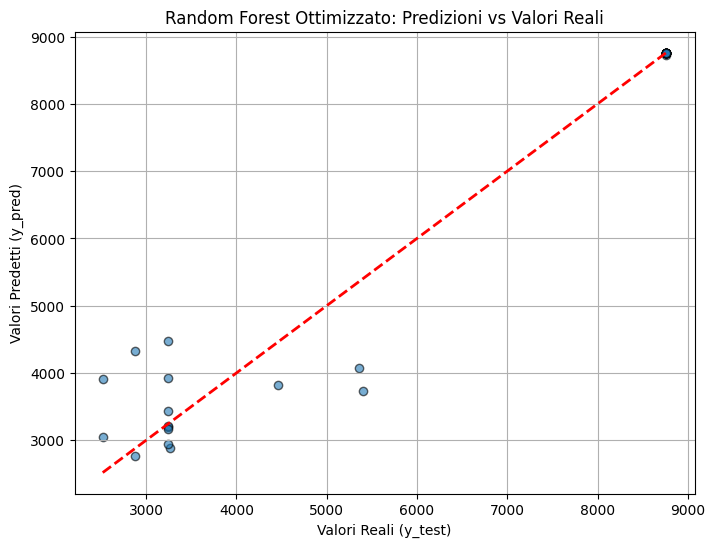

In [34]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione della funzione di valutazione
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modello"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred) / 24
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) / 24
    r2 = r2_score(y_test, y_pred)

    print(f"\n*** {model_name} ***")
    print(f"MAE  = {mae:.4f}")
    print(f"MAPE = {mape:.4%}")
    print(f"MSE  = {mse:.2f}")
    print(f"R²   = {r2:.4f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
    plt.xlabel("Valori Reali (y_test)")
    plt.ylabel("Valori Predetti (y_pred)")
    plt.title(f"{model_name}: Predizioni vs Valori Reali")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)
    plt.grid(True)
    plt.show()

# Definiamo la griglia di iperparametri
param_grid = {
    'n_estimators': [200, 400, 600, 800],  # Numero di alberi nella foresta
    'max_depth': [10, 20, 30],             # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10],       # Minimo numero di campioni per split
    'min_samples_leaf': [1, 2, 4],         # Minimo numero di campioni nelle foglie
}

# Inizializziamo il modello
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Creiamo il GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',       # Ottimizziamo per il valore R²
    cv=5,               # 5-fold Cross Validation
    verbose=2,
    n_jobs=-1
)

# Addestriamo la GridSearch
grid_search.fit(X_train, y_train)

# Stampiamo i migliori parametri trovati
print(f"\nMigliori parametri trovati: {grid_search.best_params_}")

# Valutiamo il miglior modello trovato
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_train, y_train, X_test, y_test, "Random Forest Ottimizzato")



Migliori parametri trovati: (300, 0.01, 3, 0.9, 0.7)

*** XGBoost Ottimizzato ***
MAE  = 16.7228
MAPE = 10.8949%
MSE  = 16907.57
R²   = 0.9451


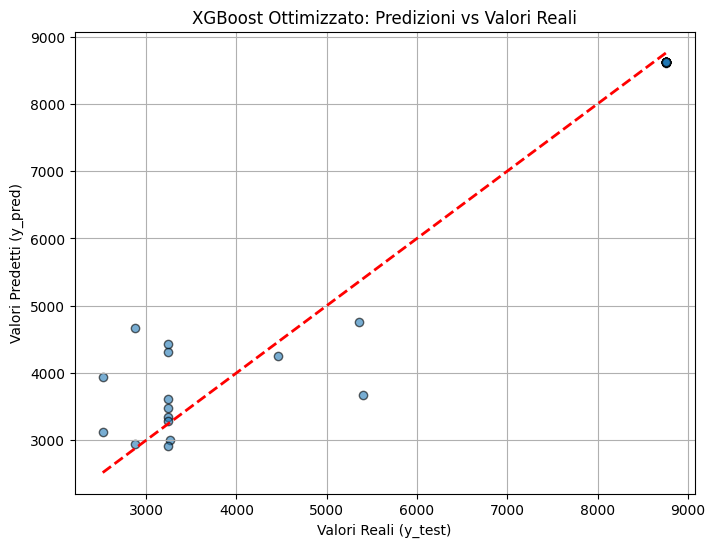

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from itertools import product

# Funzione per valutare il modello
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modello"):
    """ Addestra il modello e stampa le metriche di valutazione. """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred) / 24
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) / 24
    r2 = r2_score(y_test, y_pred)

    print(f"\n*** {model_name} ***")
    print(f"MAE  = {mae:.4f}")
    print(f"MAPE = {mape:.4%}")
    print(f"MSE  = {mse:.2f}")
    print(f"R²   = {r2:.4f}")

    # Grafico Predizioni vs Valori Reali
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
    plt.xlabel("Valori Reali (y_test)")
    plt.ylabel("Valori Predetti (y_pred)")
    plt.title(f"{model_name}: Predizioni vs Valori Reali")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)
    plt.grid(True)
    plt.show()

# Definizione del parametro grid manuale
param_grid = {
    'n_estimators': [100, 300, 500],        # Numero di alberi
    'learning_rate': [0.01, 0.05, 0.1],     # Tasso di apprendimento
    'max_depth': [3, 6, 10],                # Profondità degli alberi
    'subsample': [0.7, 0.9, 1.0],           # Campionamento dei dati
    'colsample_bytree': [0.7, 0.9, 1.0]     # Percentuale di feature usate per albero
}

# Creiamo tutte le combinazioni di parametri
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['learning_rate'],
    param_grid['max_depth'],
    param_grid['subsample'],
    param_grid['colsample_bytree']
))

# Variabili per tracciare il miglior modello
best_model = None
best_score = float('-inf')
best_params = None

# Loop su tutte le combinazioni
for params in param_combinations:
    n_estimators, learning_rate, max_depth, subsample, colsample_bytree = params

    # Inizializza il modello con i parametri attuali
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    # Addestramento e valutazione
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Salviamo il miglior modello
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_params = params

# Stampiamo i migliori parametri trovati
print(f"\nMigliori parametri trovati: {best_params}")

# Valutiamo il miglior modello
evaluate_model(best_model, X_train, y_train, X_test, y_test, "XGBoost Ottimizzato")


*** Linear Regression ***
MAE = 24.908970742755468
MAPE = 0.15578289722042077
MSE = 29778.621550535947
R2 = 0.9032785545683603


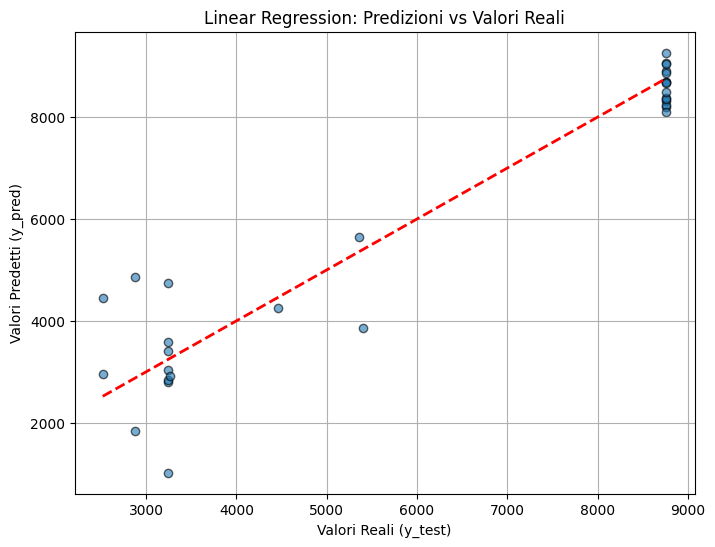

In [36]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 2
MAE: 19.1674
MAPE: 13.0774%
MSE: 29591.0059
R2: 0.9039


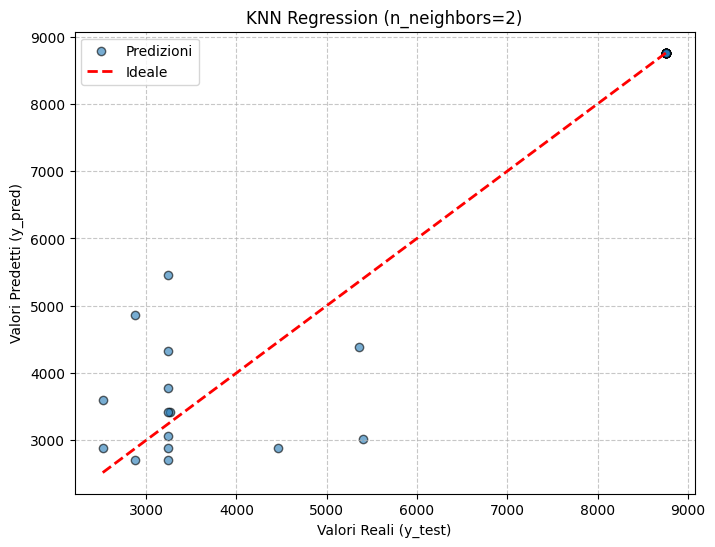

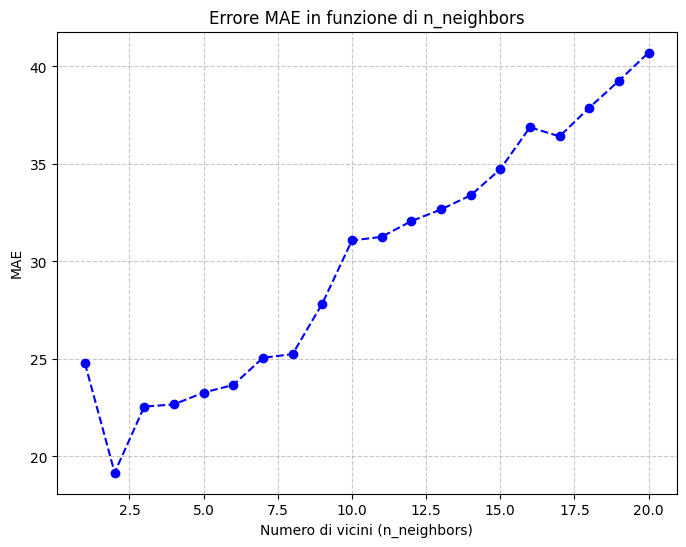

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = (mean_squared_error(y_test, y_pred)) /24
r2 = r2_score(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Possibili Migliorie e Affinamenti:
1) Avere più informazioni sulle macchine aiuterebbe a individuare le caratteristiche più importanti ed a misurarle ed analizzarle correttamente, come: più info sull'output delle macchine o sul costo della manutenzione.

2) Analisi sulla curva di efficienza - Tempi tra eventi.